In [59]:
import pandas as pd
#df = pd.read_csv('source/ais_data_discretized.csv', nrows=100000)
df = pd.read_csv('source/ais_data_deduplicated.csv')
df.shape

(38017576, 8)

In [149]:
df.head()

,Unnamed: 0,date_time,mmsi,course,speed,longitude,latitude,class
0,0,2017-09-06 08:13:15+00:00,247144390,0.142857,0.333333,12.68286,37.23098,0
1,1,2017-09-06 08:13:15+00:00,247100100,0.285714,0.000000,12.69433,33.75967,1
2,2,2017-09-06 08:04:09+00:00,247300080,0.428571,0.333333,12.70149,35.52302,0
3,3,2017-09-06 08:12:14+00:00,247305840,0.714286,0.000000,12.70958,36.91732,0
4,4,2017-09-06 08:02:08+00:00,247306530,0.571429,0.000000,12.73139,36.90751,0


# Number of ships with appear just once

In [3]:
v = df['mmsi'].value_counts()

In [8]:
a = (v == 1).sum()
a

778

In [9]:
b = (v > 1).sum()
b

13372

In [10]:
a + b

14150

In [11]:
a/(a+b)

0.05498233215547703

# Record frequency by MMSI

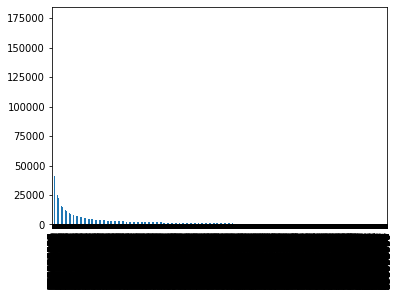

In [141]:
df['mmsi'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

# Binning

In [60]:
v = df['mmsi'].value_counts()

In [81]:
df2 = v.to_frame()

371158000    175759
215788000    156440
248692000    139199
248230000    130829
256000113    125583
Name: mmsi, dtype: int64

In [143]:
import numpy as np
min_value = df2['mmsi'].min()
max_value = df2['mmsi'].max()

labels = ["1-100", "100-500", "500-1000", "1000-2500", "2500-5000","5000-10000", ">10000"]
bins = [1, 100,500,1000,2500,5000,10000, max_value]

In [144]:
df2['binned'] = pd.cut(df2['mmsi'], bins=bins, labels=labels,include_lowest=True)

In [145]:
df2['binned']

371158000    >10000
215788000    >10000
248692000    >10000
248230000    >10000
256000113    >10000
              ...  
538012429     1-100
371743760     1-100
538093377     1-100
970117066     1-100
304126979     1-100
Name: binned, Length: 14150, dtype: category
Categories (7, object): [1-100 < 100-500 < 500-1000 < 1000-2500 < 2500-5000 < 5000-10000 < >10000]

In [146]:
min_value, max_value

(1, 175759)

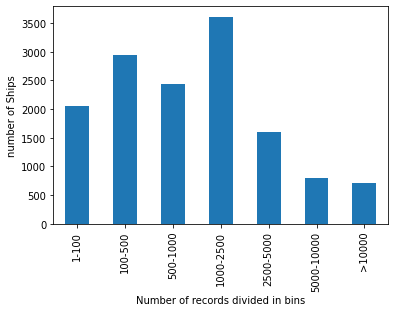

In [147]:
df2['binned'].value_counts().loc[labels].plot.bar()
plt.xlabel('Number of records divided in bins')
plt.ylabel('number of Ships')
plt.xticks(rotation=90)
plt.show()

In [142]:
df2['binned'].value_counts()

1000-5000     5201
100-500       2949
500-1000      2439
1-100         2044
5000-10000     802
>10000         715
Name: binned, dtype: int64

In [148]:
df2['binned'].value_counts().sum()

14150

# Range row and column

In [150]:
import pandas as pd
#df = pd.read_csv('source/ais_data_discretized.csv', nrows=100000)
df = pd.read_csv('source/ais_data_next_status_60.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,class,column,course,date_time,index,latitude,longitude,mmsi,next_status_60_column,next_status_60_date_time,next_status_60_row,row,speed
0,13,13,13.0,0.0,126.0,0.571429,2016-10-26 00:20:28+00:00,15568808.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:20:27+00:00,340.0,353.0,0.666667
1,14,14,14.0,0.0,126.0,0.571429,2016-10-26 00:23:29+00:00,15568993.0,35.35294,12.63126,111247508.0,129.0,2016-10-26 01:23:29+00:00,340.0,353.0,0.666667
2,15,15,15.0,0.0,127.0,0.571429,2016-10-26 00:35:27+00:00,15569644.0,34.95978,12.71980,111247508.0,129.0,2016-10-26 01:35:18+00:00,340.0,349.0,0.666667
3,16,16,16.0,0.0,128.0,0.571429,2016-10-26 00:56:17+00:00,15570855.0,34.21719,12.88836,111247508.0,128.0,2016-10-26 01:56:21+00:00,342.0,342.0,0.333333
4,17,17,17.0,0.0,129.0,0.000000,2016-10-26 01:11:10+00:00,15571708.0,34.01085,12.97691,111247508.0,127.0,2016-10-26 02:11:24+00:00,348.0,340.0,0.333333


In [151]:
rmin = df['row'].min()
rmax = df['row'].max()
rmax - rmin

54.0

In [152]:
cmin = df['column'].min()
cmax = df['column'].max()
cmax - cmin

61.0

In [153]:
rmin,rmax, cmin,cmax

(323.0, 377.0, 99.0, 160.0)

# Classes Bar chart

In [1]:
import pandas as pd
#df = pd.read_csv('source/ais_data_discretized.csv', nrows=100000)
df = pd.read_csv('source/dataset_60.csv')
df.shape

(27403430, 15)

In [70]:
%matplotlib inline

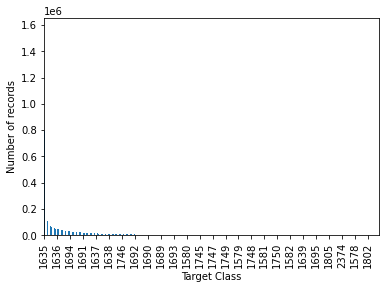

In [75]:
import matplotlib.pyplot as plt
import numpy as np

count = df['target'].value_counts()
count.plot.bar()
plt.xticks(np.arange(min(count.index), max(count.index)+1, 100.0))
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

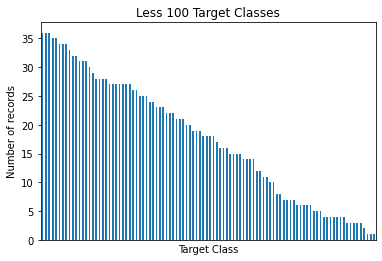

In [92]:
top_100 = count[len(count)-100:]
top_100.plot.bar()
#plt.xticks(np.arange(min(top_100.index), max(top_100.index)+1))
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.title('Less 100 Target Classes')
plt.xticks([])
plt.show()

In [73]:
count.median()

1652.0

In [60]:
count.mean()

10596.84068058778

In [82]:
df_count = pd.DataFrame(count)

In [84]:
df_count.head()

,target
1635,1575185
1636,1027272
1694,794045
1691,618169
1637,497888


In [86]:
df_count[df_count.target < 1000].count()

target    1014
dtype: int64

In [90]:
df_count[df_count.target >= 1000].count()

target    1572
dtype: int64

In [89]:
df_count.count()

target    2586
dtype: int64

In [93]:
df_count[df_count.target < 100].count()

target    189
dtype: int64

In [94]:
df_count[df_count.target < 50].count()

target    119
dtype: int64